Accuracy: 99.75%

Classification Report:
              precision    recall  f1-score   support

      benign       0.99      1.00      1.00     14969
     malware       1.00      0.99      1.00     15031

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000


Feature Importances:
nvcsw          0.412002
maj_flt        0.207704
prio           0.206994
nivcsw         0.131989
min_flt        0.024867
millisecond    0.016444
dtype: float64


<ipython-input-1-cb0444c6ae49>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="coolwarm")


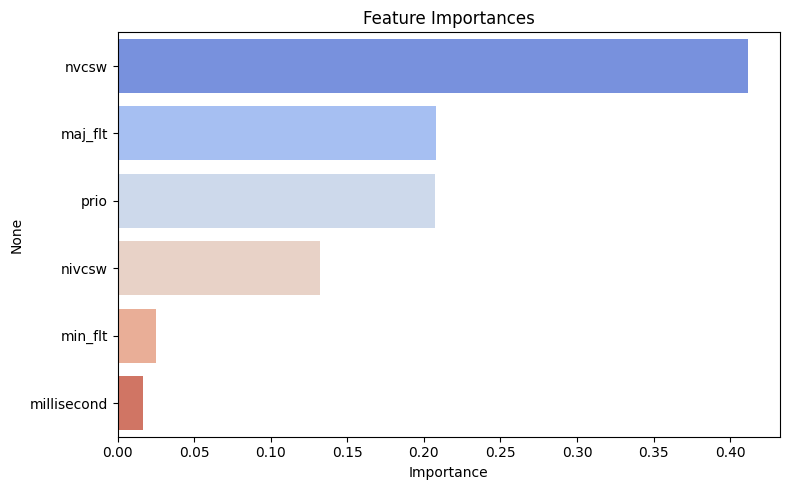

Cross-Validation Accuracy: 78.44%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the dataset
file_path = "Malware_dataset.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Keep relevant columns
columns_to_keep = ["millisecond", "classification", "prio", "nvcsw", "nivcsw", "min_flt", "maj_flt"]
data = data[columns_to_keep].dropna()

# Define features and target
X = data.drop("classification", axis=1)
y = data["classification"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest with reduced complexity
clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="coolwarm")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Start with one column and write down the accuracy and cross validation accuracy and keep adding one new column and repeat

See which one had the highest accuracy and highest cross validation accuracy so it doesnt overfit

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "Malware_dataset.csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_keep = [
    "nvcsw", "maj_flt", "prio", "nivcsw", "min_flt", "millisecond", "classification"
]
data = data[columns_to_keep]

# Handle missing values
data = data.dropna()

# Encode the target variable
le = LabelEncoder()
data["classification"] = le.fit_transform(data["classification"])

# Define features (X) and target (y)
X = data.drop("classification", axis=1)
y = data["classification"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_accuracies = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)

    # Build the TensorFlow model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(y_train_categorical.shape[1], activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model
    model.fit(
        X_train, y_train_categorical,
        validation_split=0.2,
        epochs=10,
        batch_size=64,
        verbose=1
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
    kfold_accuracies.append(test_accuracy)

# Calculate the average accuracy across folds
average_cv_accuracy = np.mean(kfold_accuracies)
print(f"Cross-Validation Accuracy: {average_cv_accuracy * 100:.2f}%")

# Final training on all data for test accuracy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

model.fit(
    X_train, y_train_categorical,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

final_loss, final_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7848 - loss: 0.4380 - val_accuracy: 0.9029 - val_loss: 0.2705
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8813 - loss: 0.2752 - val_accuracy: 0.9148 - val_loss: 0.2797
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8965 - loss: 0.2383 - val_accuracy: 0.9112 - val_loss: 0.2686
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9070 - loss: 0.2180 - val_accuracy: 0.9074 - val_loss: 0.2780
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9161 - loss: 0.1969 - val_accuracy: 0.9067 - val_loss: 0.2617
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9271 - loss: 0.1776 - val_accuracy: 0.9027 - val_loss: 0.2492
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9324 - loss: 0.1641 - val_accuracy: 0.9105 - val_loss: 0.2306
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9345 - loss: 0.1537 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7885 - loss: 0.4352 - val_accuracy: 0.9203 - val_loss: 0.2692
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8837 - loss: 0.2734 - val_accuracy: 0.9121 - val_loss: 0.3028
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8950 - loss: 0.2415 - val_accuracy: 0.9156 - val_loss: 0.2956
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9047 - loss: 0.2208 - val_accuracy: 0.9237 - val_loss: 0.2777
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9094 - loss: 0.2077 - val_accuracy: 0.9201 - val_loss: 0.2733
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9125 - loss: 0.1987 - val_accuracy: 0.9234 - val_loss: 0.2802
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9155 - loss: 0.1885 - val_accuracy: 0.9176 - val_loss: 0.2649
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9206 - loss: 0.1781 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7973 - loss: 0.4249 - val_accuracy: 0.9124 - val_loss: 0.2454
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8869 - loss: 0.2706 - val_accuracy: 0.9155 - val_loss: 0.2496
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9001 - loss: 0.2371 - val_accuracy: 0.9241 - val_loss: 0.2437
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9051 - loss: 0.2183 - val_accuracy: 0.9182 - val_loss: 0.2547
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9088 - loss: 0.2067 - val_accuracy: 0.9064 - val_loss: 0.2446
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9138 - loss: 0.1941 - val_accuracy: 0.9107 - val_loss: 0.2442
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9189 - loss: 0.1830 - val_accuracy: 0.9132 - val_loss: 0.2726
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9217 - loss: 0.1731 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7873 - loss: 0.4340 - val_accuracy: 0.9006 - val_loss: 0.2656
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8830 - loss: 0.2755 - val_accuracy: 0.9129 - val_loss: 0.2345
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8982 - loss: 0.2416 - val_accuracy: 0.9144 - val_loss: 0.2318
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9071 - loss: 0.2185 - val_accuracy: 0.9332 - val_loss: 0.2064
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9114 - loss: 0.2051 - val_accuracy: 0.9221 - val_loss: 0.2238
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9171 - loss: 0.1919 - val_accuracy: 0.9346 - val_loss: 0.1982
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9248 - loss: 0.1792 - val_accuracy: 0.9290 - val_loss: 0.2008
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9269 - loss: 0.1703 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7919 - loss: 0.4317 - val_accuracy: 0.9001 - val_loss: 0.2709
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8822 - loss: 0.2746 - val_accuracy: 0.9221 - val_loss: 0.2661
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8951 - loss: 0.2420 - val_accuracy: 0.9139 - val_loss: 0.2804
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9065 - loss: 0.2180 - val_accuracy: 0.9101 - val_loss: 0.2669
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9135 - loss: 0.2012 - val_accuracy: 0.9070 - val_loss: 0.2290
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9211 - loss: 0.1860 - val_accuracy: 0.9006 - val_loss: 0.2471
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9257 - loss: 0.1759 - val_accuracy: 0.9084 - val_loss: 0.2259
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9314 - loss: 0.1633 - val_accurac

In [1]:
#Deepseek

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

# Load the dataset
file_path = "Malware_dataset.csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_keep = [
    "nvcsw", "maj_flt", "prio", "nivcsw", "min_flt", "millisecond", "classification"
]
data = data[columns_to_keep]

# Handle missing values
data = data.dropna()

# Encode the target variable
le = LabelEncoder()
data["classification"] = le.fit_transform(data["classification"])

# Define features (X) and target (y)
X = data.drop("classification", axis=1)
y = data["classification"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_accuracies = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_train_categorical = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)

    # Build the TensorFlow model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(y_train_categorical.shape[1], activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model
    model.fit(
        X_train, y_train_categorical,
        validation_split=0.2,
        epochs=20,
        batch_size=64,
        verbose=1
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
    kfold_accuracies.append(test_accuracy)

    # Print classification report
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

# Calculate the average accuracy across folds
average_cv_accuracy = np.mean(kfold_accuracies)
print(f"Cross-Validation Accuracy: {average_cv_accuracy * 100:.2f}%")

# Final training on all data for test accuracy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

model.fit(
    X_train, y_train_categorical,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

final_loss, final_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")

# Save the model
#model.save("malware_detection_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8015 - loss: 0.7146 - val_accuracy: 0.9056 - val_loss: 0.2997
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8725 - loss: 0.3605 - val_accuracy: 0.8913 - val_loss: 0.3520
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8860 - loss: 0.3351 - val_accuracy: 0.9149 - val_loss: 0.2873
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8905 - loss: 0.3184 - val_accuracy: 0.9065 - val_loss: 0.3176
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8963 - loss: 0.3066 - val_accuracy: 0.9013 - val_loss: 0.3049
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8950 - loss: 0.2994 - val_accuracy: 0.9183 - val_loss: 0.2875
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8997 - loss: 0.2942 - val_accuracy: 0.8866 - val_loss: 0.3355
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9029 - loss: 0.2837 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8113 - loss: 0.7168 - val_accuracy: 0.8923 - val_loss: 0.3711
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8734 - loss: 0.3609 - val_accuracy: 0.9020 - val_loss: 0.3485
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8862 - loss: 0.3340 - val_accuracy: 0.9172 - val_loss: 0.3020
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8938 - loss: 0.3175 - val_accuracy: 0.8978 - val_loss: 0.3210
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8955 - loss: 0.3074 - val_accuracy: 0.9072 - val_loss: 0.3226
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8988 - loss: 0.2969 - val_accuracy: 0.8817 - val_loss: 0.3638
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9023 - loss: 0.2902 - val_accuracy: 0.9137 - val_loss: 0.3129
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9040 - loss: 0.2845 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8095 - loss: 0.7070 - val_accuracy: 0.9252 - val_loss: 0.3006
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8721 - loss: 0.3601 - val_accuracy: 0.9258 - val_loss: 0.2860
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8875 - loss: 0.3310 - val_accuracy: 0.9212 - val_loss: 0.2932
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8905 - loss: 0.3205 - val_accuracy: 0.9046 - val_loss: 0.3459
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8960 - loss: 0.3072 - val_accuracy: 0.9127 - val_loss: 0.3214
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8949 - loss: 0.3000 - val_accuracy: 0.9297 - val_loss: 0.3128
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9012 - loss: 0.2928 - val_accuracy: 0.8921 - val_loss: 0.3794
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9017 - loss: 0.2862 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8115 - loss: 0.7111 - val_accuracy: 0.9066 - val_loss: 0.3188
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8770 - loss: 0.3565 - val_accuracy: 0.8938 - val_loss: 0.3619
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8887 - loss: 0.3287 - val_accuracy: 0.9044 - val_loss: 0.3113
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8924 - loss: 0.3145 - val_accuracy: 0.9269 - val_loss: 0.2728
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8948 - loss: 0.3077 - val_accuracy: 0.9024 - val_loss: 0.3054
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8990 - loss: 0.2959 - val_accuracy: 0.8909 - val_loss: 0.2969
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9029 - loss: 0.2865 - val_accuracy: 0.9114 - val_loss: 0.3102
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9029 - loss: 0.2842 - val_accurac

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8093 - loss: 0.6963 - val_accuracy: 0.9155 - val_loss: 0.3283
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8714 - loss: 0.3628 - val_accuracy: 0.9234 - val_loss: 0.3086
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8848 - loss: 0.3337 - val_accuracy: 0.9377 - val_loss: 0.3079
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8910 - loss: 0.3199 - val_accuracy: 0.9261 - val_loss: 0.3194
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8944 - loss: 0.3128 - val_accuracy: 0.8924 - val_loss: 0.3721
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8988 - loss: 0.2981 - val_accuracy: 0.9235 - val_loss: 0.2709
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8995 - loss: 0.2936 - val_accuracy: 0.9112 - val_loss: 0.3444
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9015 - loss: 0.2867 - val_accurac